In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import kurtosis, skew
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from pycaret.regression import *

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [150]:
df = pd.read_csv('/content/books.csv', on_bad_lines='skip')
# df = pd.read_csv('books2.csv')

In [151]:
df.shape

(11123, 12)

# Renaming num_pages Column

In [152]:
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

# Creating Audiobook Column

In [153]:
df['audiobook'] = df['publisher'].str.contains('audio|audiobook|audiobooks', case=False, na=False).astype(int)

# Correcting num_pages And audiobook Information

In [154]:
df.loc[df['title'] == 'The Mask of the Enchantress', 'num_pages'] = 327
df.loc[df['title'] == 'The Da Vinci Code (Robert Langdon #2)', 'num_pages'] = 489
df.loc[df['title'] == 'Caligula and Three Other Plays', 'num_pages'] = 302
df.loc[df['title'] == 'Dirty White Boys', 'num_pages'] = 496
df.loc[df['title'] == 'A Caribbean Mystery', 'num_pages'] = 224
df.loc[df['title'] == 'Open House', 'num_pages'] = 272
df.loc[df['title'] == "Gulliver's Travels", 'num_pages'] = 306
df.loc[df['title'] == 'The Far Pavilions', 'num_pages'] = 958
df.loc[df['title'] == 'Blind Willow Sleeping Woman: 24 Stories', 'num_pages'] = 362
df.loc[df['title'] == 'One Two Buckle My Shoe (Hercule Poirot #23)', 'audiobook'] = 1
df.loc[df['title'] == 'The Feynman Lectures on Physics Vols 7-8', 'audiobook'] = 1
df.loc[df['title'].str.contains("The Botany of Desire: A Plant's-Eye View of"), 'num_pages'] = 304
df.loc[df['title'] == 'Here We All Are', 'audiobook'] = 1
df.loc[df['title'] == 'Since "Silent Spring"', 'num_pages'] = 297
df.loc[df['isbn'].str.contains("1594839417"), 'num_pages'] = 388
df.loc[df['isbn'].str.contains("1594832285"), 'num_pages'] = 454
df.loc[df['title'] == 'The Chessmen of Mars (Barsoom #5)', 'audiobook'] = 1
df.loc[df['title'] == 'Tiempo De Matar', 'num_pages'] = 648
df.loc[df['title'] == 'Turn of the Cards', 'num_pages'] = 221
df.loc[df['title'] == 'First King of Shannara (Shannara Prequel)', 'num_pages'] = 448
df.loc[df['title'].str.contains("Return to the Planet of the Apes #2: Escape fr"), 'num_pages'] = 192
df.loc[df['title'].str.contains("The Complete Science Fiction Treasury of H.G."), 'num_pages'] = 860
df.loc[df['isbn'].str.contains("1400102952"), 'num_pages'] = 362
df.loc[df['title'] == 'Der Prozess', 'num_pages'] = 208
df.loc[df['title'] == 'The Celestine Prophecy', 'num_pages'] = 247
df.loc[df['isbn'] == '1572703857', 'audiobook'] = 1
df.loc[df['title'] == 'Madame Bovary', 'num_pages'] = 329
df.loc[df['title'] == 'The Best American Mystery Stories 2004', 'num_pages'] = 432

# Filtering Dataset

### Dropping rows that belong to books with 0 pages that aren't audiobooks and dropping rows that especifically say "NOT A BOOK"

In [155]:
drop_condition = (df['num_pages'] == 0) & (df['audiobook'] == 0)

df.drop(df[drop_condition].index, inplace=True)
df = df[df['authors'] != 'NOT A BOOK']

In [156]:
df.shape

(11111, 13)

# Cheking For Null Values

In [157]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
audiobook             0
dtype: int64

# Convert All Values to Lowercase

In [158]:
df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,audiobook
0,1,harry potter and the half-blood prince (harry ...,j.k. rowling/mary grandpré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,scholastic inc.,0
1,2,harry potter and the order of the phoenix (har...,j.k. rowling/mary grandpré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,scholastic inc.,0
2,4,harry potter and the chamber of secrets (harry...,j.k. rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,scholastic,0
3,5,harry potter and the prisoner of azkaban (harr...,j.k. rowling/mary grandpré,4.56,043965548x,9780439655484,eng,435,2339585,36325,5/1/2004,scholastic inc.,0
4,8,harry potter boxed set books 1-5 (harry potte...,j.k. rowling/mary grandpré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,scholastic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,expelled from eden: a william t. vollmann reader,william t. vollmann/larry mccaffery/michael he...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,da capo press,0
11119,45633,you bright and risen angels,william t. vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,penguin books,0
11120,45634,the ice-shirt (seven dreams #1),william t. vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,penguin books,0
11121,45639,poor people,william t. vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,ecco,0


# Drop useless columns

In [159]:
df = df.drop(columns=['bookID', 'isbn', 'isbn13'])

# Fix Language Column

In [160]:
df['language_code'] = df['language_code'].astype(str)

df.loc[df['language_code'].str.contains('en'), 'language_code'] = 'eng'

counts = df['language_code'].value_counts()
df['language_code'] = df['language_code'].apply(lambda x: 'other' if counts[x] < 5 else x)

df.language_code.value_counts()

eng      10528
spa        218
fre        144
ger         99
jpn         46
mul         19
other       17
zho         14
grc         11
por         10
ita          5
Name: language_code, dtype: int64

# Drop Duplicate Rows

In [161]:
df = df.drop_duplicates()

# Check For Unique Values Per Column

In [162]:
for col in df.columns:
    print(df[col].value_counts(), '\n')

The Iliad                                                              9
The Brothers Karamazov                                                 9
Gulliver's Travels                                                     8
Anna Karenina                                                          8
The Odyssey                                                            8
                                                                      ..
The Noonday Demon: An Anatomy of Depression                            1
My Secret: A PostSecret Book                                           1
The Secret Lives of Men and Women: A PostSecret Book                   1
The Secret Life of Houdini: The Making of America's First Superhero    1
Las aventuras de Tom Sawyer                                            1
Name: title, Length: 10336, dtype: int64 

P.G. Wodehouse                                            40
Stephen King                                              40
Rumiko Takahashi                

# Creating author_popularity Column

In [163]:
author_popularity = df['authors'].value_counts().reset_index()
author_popularity.columns = ['authors', 'author_popularity']
df = pd.merge(df, author_popularity, on='authors', how='left')


# Creating publisher_popularity Column

In [164]:
publisher_popularity = df['publisher'].value_counts().reset_index()
publisher_popularity.columns = ['publisher', 'publisher_popularity']
df = pd.merge(df, publisher_popularity, on='publisher', how='left')


# Creating year Column

In [165]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [166]:
df['year'] = df['publication_date'].dt.year

In [167]:
df = df.drop(columns=['publication_date'])

# Create title_length column

In [168]:
df['title_length'] = df['title'].apply(len)
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,audiobook,author_popularity,publisher_popularity,year,title_length
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,0,6,13,2006.0,57
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,0,6,13,2004.0,60
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,0,11,33,2003.0,58
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,0,6,13,2004.0,59
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,0,6,33,2004.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press,0,1,21,2004.0,48
11107,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books,0,5,261,1988.0,27
11108,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books,0,5,261,1993.0,31
11109,Poor People,William T. Vollmann,3.72,eng,434,769,139,Ecco,0,5,19,2007.0,11


# Create author_count column

In [169]:
df['author_count'] = df['authors'].apply(lambda x: len(x.split('/')))
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,audiobook,author_popularity,publisher_popularity,year,title_length,author_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,0,6,13,2006.0,57,2
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,0,6,13,2004.0,60,2
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,0,11,33,2003.0,58,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,0,6,13,2004.0,59,2
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,0,6,33,2004.0,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press,0,1,21,2004.0,48,3
11107,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books,0,5,261,1988.0,27,1
11108,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books,0,5,261,1993.0,31,1
11109,Poor People,William T. Vollmann,3.72,eng,434,769,139,Ecco,0,5,19,2007.0,11,1


# Encoding Variables

In [170]:
label_encoder = LabelEncoder()
df['title'] = label_encoder.fit_transform(df['title'])
df['authors'] = label_encoder.fit_transform(df['authors'])
df['language_code'] = label_encoder.fit_transform(df['language_code'])
df['publisher'] = label_encoder.fit_transform(df['publisher'])

In [79]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,audiobook,author_popularity,publisher_popularity,year,title_length,author_count
0,3066,2623,4.57,0,652,2095690,27591,1778,0,6,13,2006.0,57,2
1,3067,2623,4.49,0,870,2153167,29221,1778,0,6,13,2004.0,60,2
2,3064,2619,4.42,0,352,6333,244,1773,0,11,33,2003.0,58,1
3,3069,2623,4.56,0,435,2339585,36325,1778,0,6,13,2004.0,59,2
4,3059,2623,4.78,0,2690,41428,164,1773,0,6,33,2004.0,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,2427,6550,4.06,0,512,156,20,497,0,1,21,2004.0,48,3
11107,10204,6549,4.08,0,635,783,56,1485,0,5,261,1988.0,27,1
11108,7831,6549,3.96,0,415,820,95,1485,0,5,261,1993.0,31,1
11109,5415,6549,3.72,0,434,769,139,612,0,5,19,2007.0,11,1


# Variable Distributions

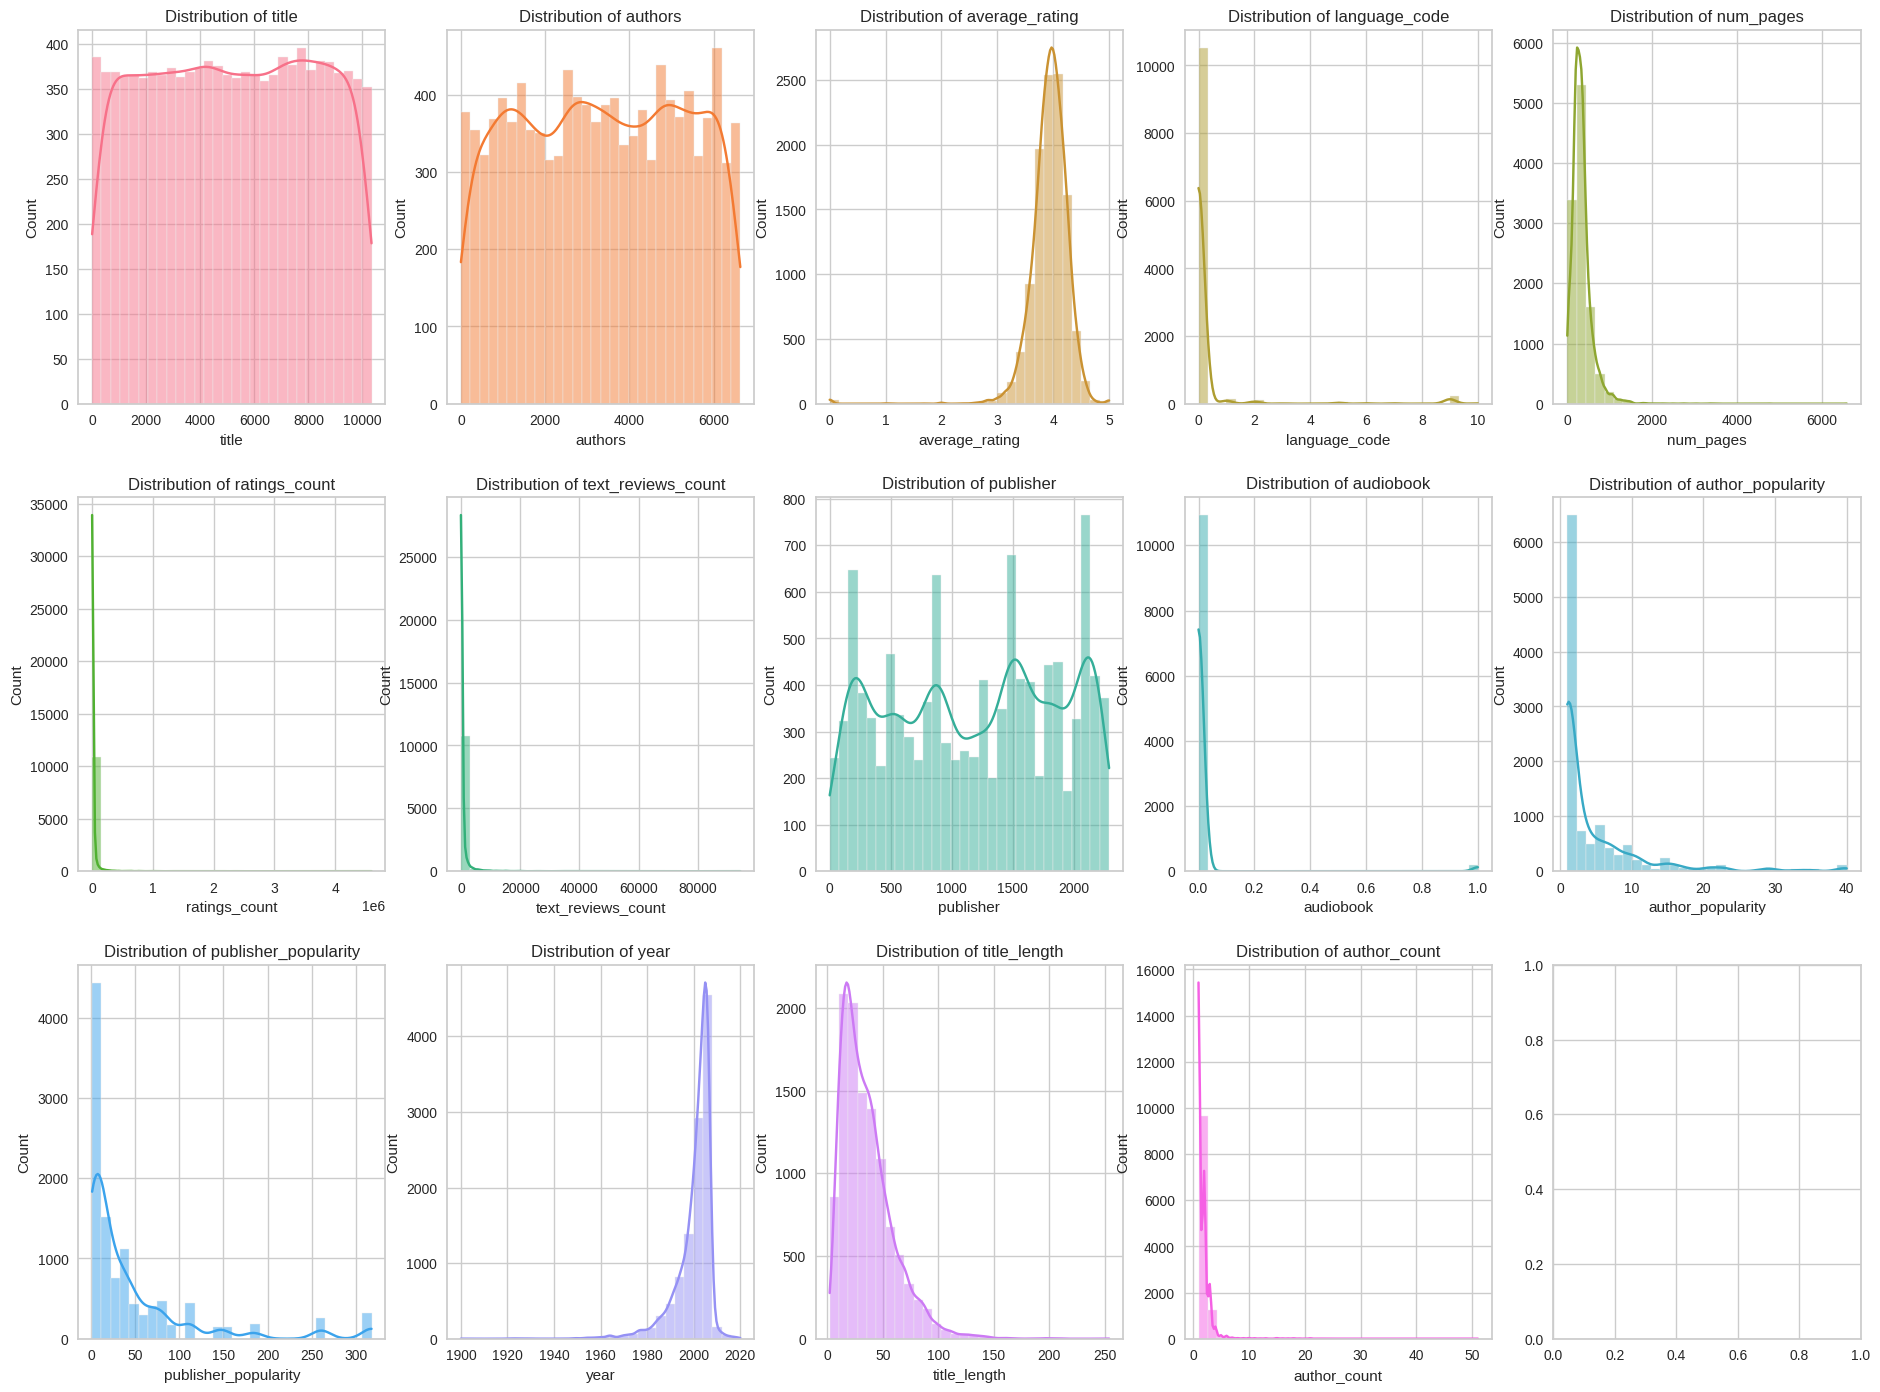

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette('husl', n_colors=15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(23, 17), gridspec_kw={'hspace': 0.25})

axes = axes.flatten()

for i, (variable, color) in enumerate(zip(df.columns, colors)):
    sns.histplot(data=df, x=variable, bins=30, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {variable}')

plt.show()

# Pearson's Correlation

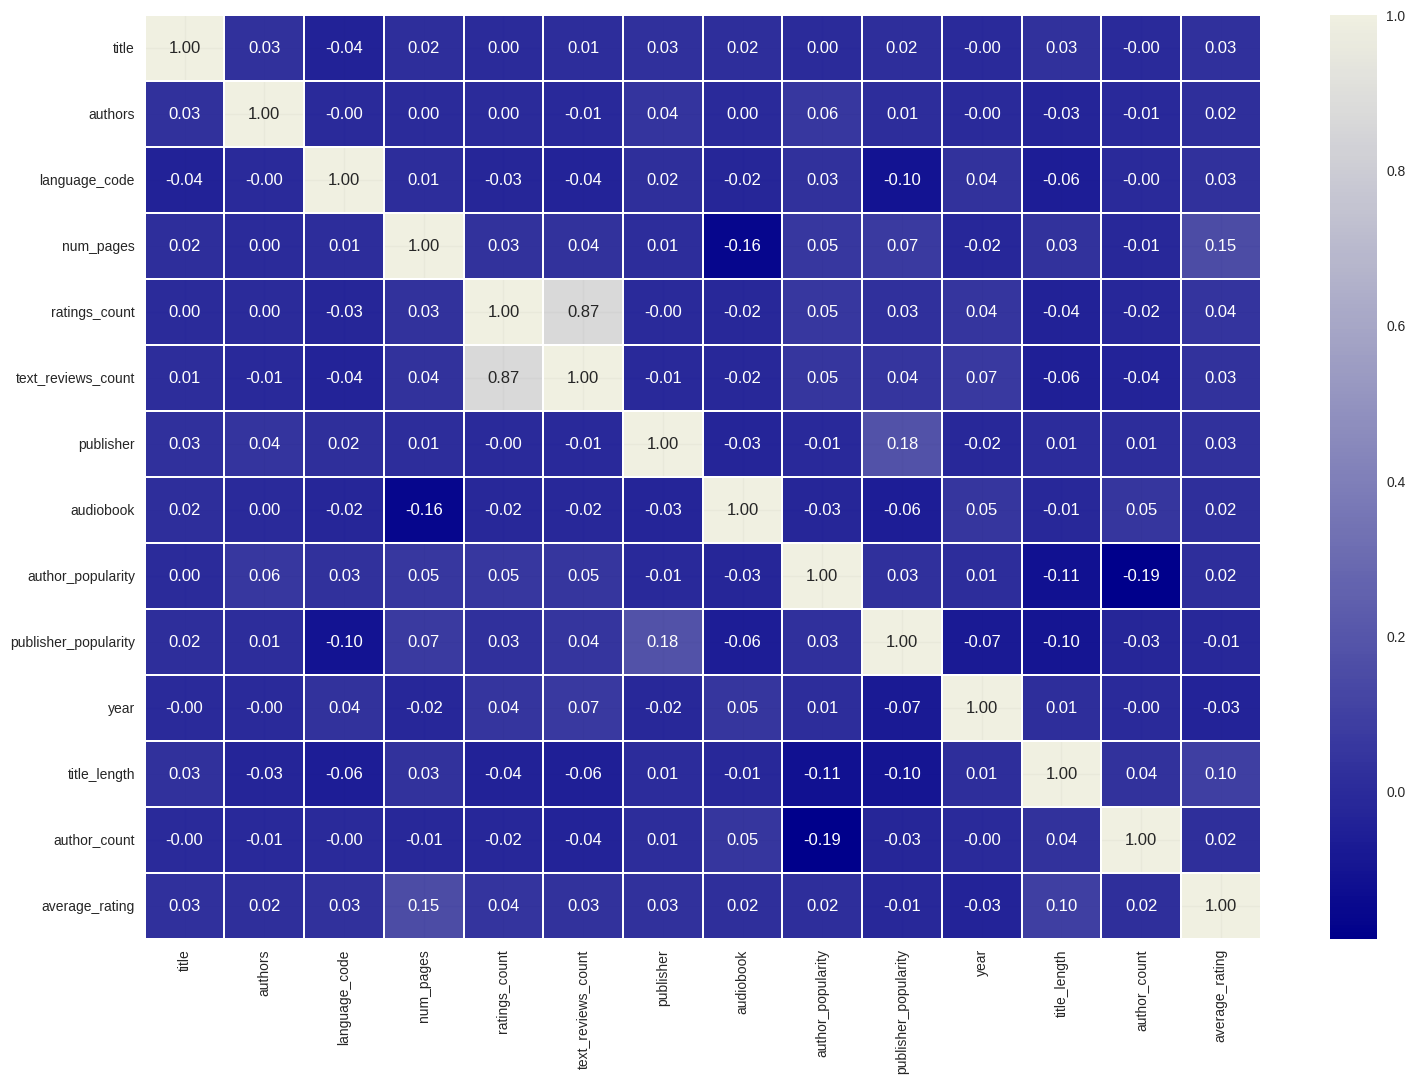

In [172]:
cmap = LinearSegmentedColormap.from_list('deep_ocean_blue', ['#00008B', '#EEDD'])
target = 'average_rating'
df2 = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df2.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f', linewidths=0.2)
plt.show()

In [82]:
df.describe()


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,audiobook,author_popularity,publisher_popularity,year,title_length,author_count
count,11111.000000,11111.000000,11111.000000,11111.000000,11111.000000,1.111100e+04,11111.000000,11111.000000,11111.00000,11111.000000,11111.000000,11109.000000,11111.000000,11111.000000
mean,5170.115921,3333.495635,3.933938,0.273603,337.547475,1.796221e+04,542.632076,1183.297723,0.01620,4.779858,46.929079,2000.171663,35.724777,1.729817
std,2979.902479,1907.699643,0.349870,1.415239,240.701238,1.125583e+05,2577.949413,678.088830,0.12625,6.798525,70.082666,8.247334,23.591926,1.820894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,1.000000,1.000000,1900.000000,2.000000,1.000000
25%,2596.500000,1673.500000,3.770000,0.000000,195.000000,1.050000e+02,9.000000,575.500000,0.00000,1.000000,5.000000,1998.000000,18.000000,1.000000
50%,5175.000000,3331.000000,3.960000,0.000000,301.000000,7.480000e+02,47.000000,1226.000000,0.00000,2.000000,20.000000,2003.000000,31.000000,1.000000
75%,7763.500000,4982.000000,4.130000,0.000000,416.000000,5.012000e+03,238.000000,1786.000000,0.00000,6.000000,56.000000,2005.000000,47.000000,2.000000
max,10335.000000,6632.000000,5.000000,10.000000,6576.000000,4.597666e+06,94265.000000,2288.000000,1.00000,40.000000,318.000000,2020.000000,254.000000,51.000000


# Cheking And Dropping NULLs

In [173]:
df = df.drop(columns='audiobook')

In [174]:
df.isna().sum()

title                   0
authors                 0
average_rating          0
language_code           0
num_pages               0
ratings_count           0
text_reviews_count      0
publisher               0
author_popularity       0
publisher_popularity    0
year                    2
title_length            0
author_count            0
dtype: int64

In [175]:
df.dropna(inplace=True)

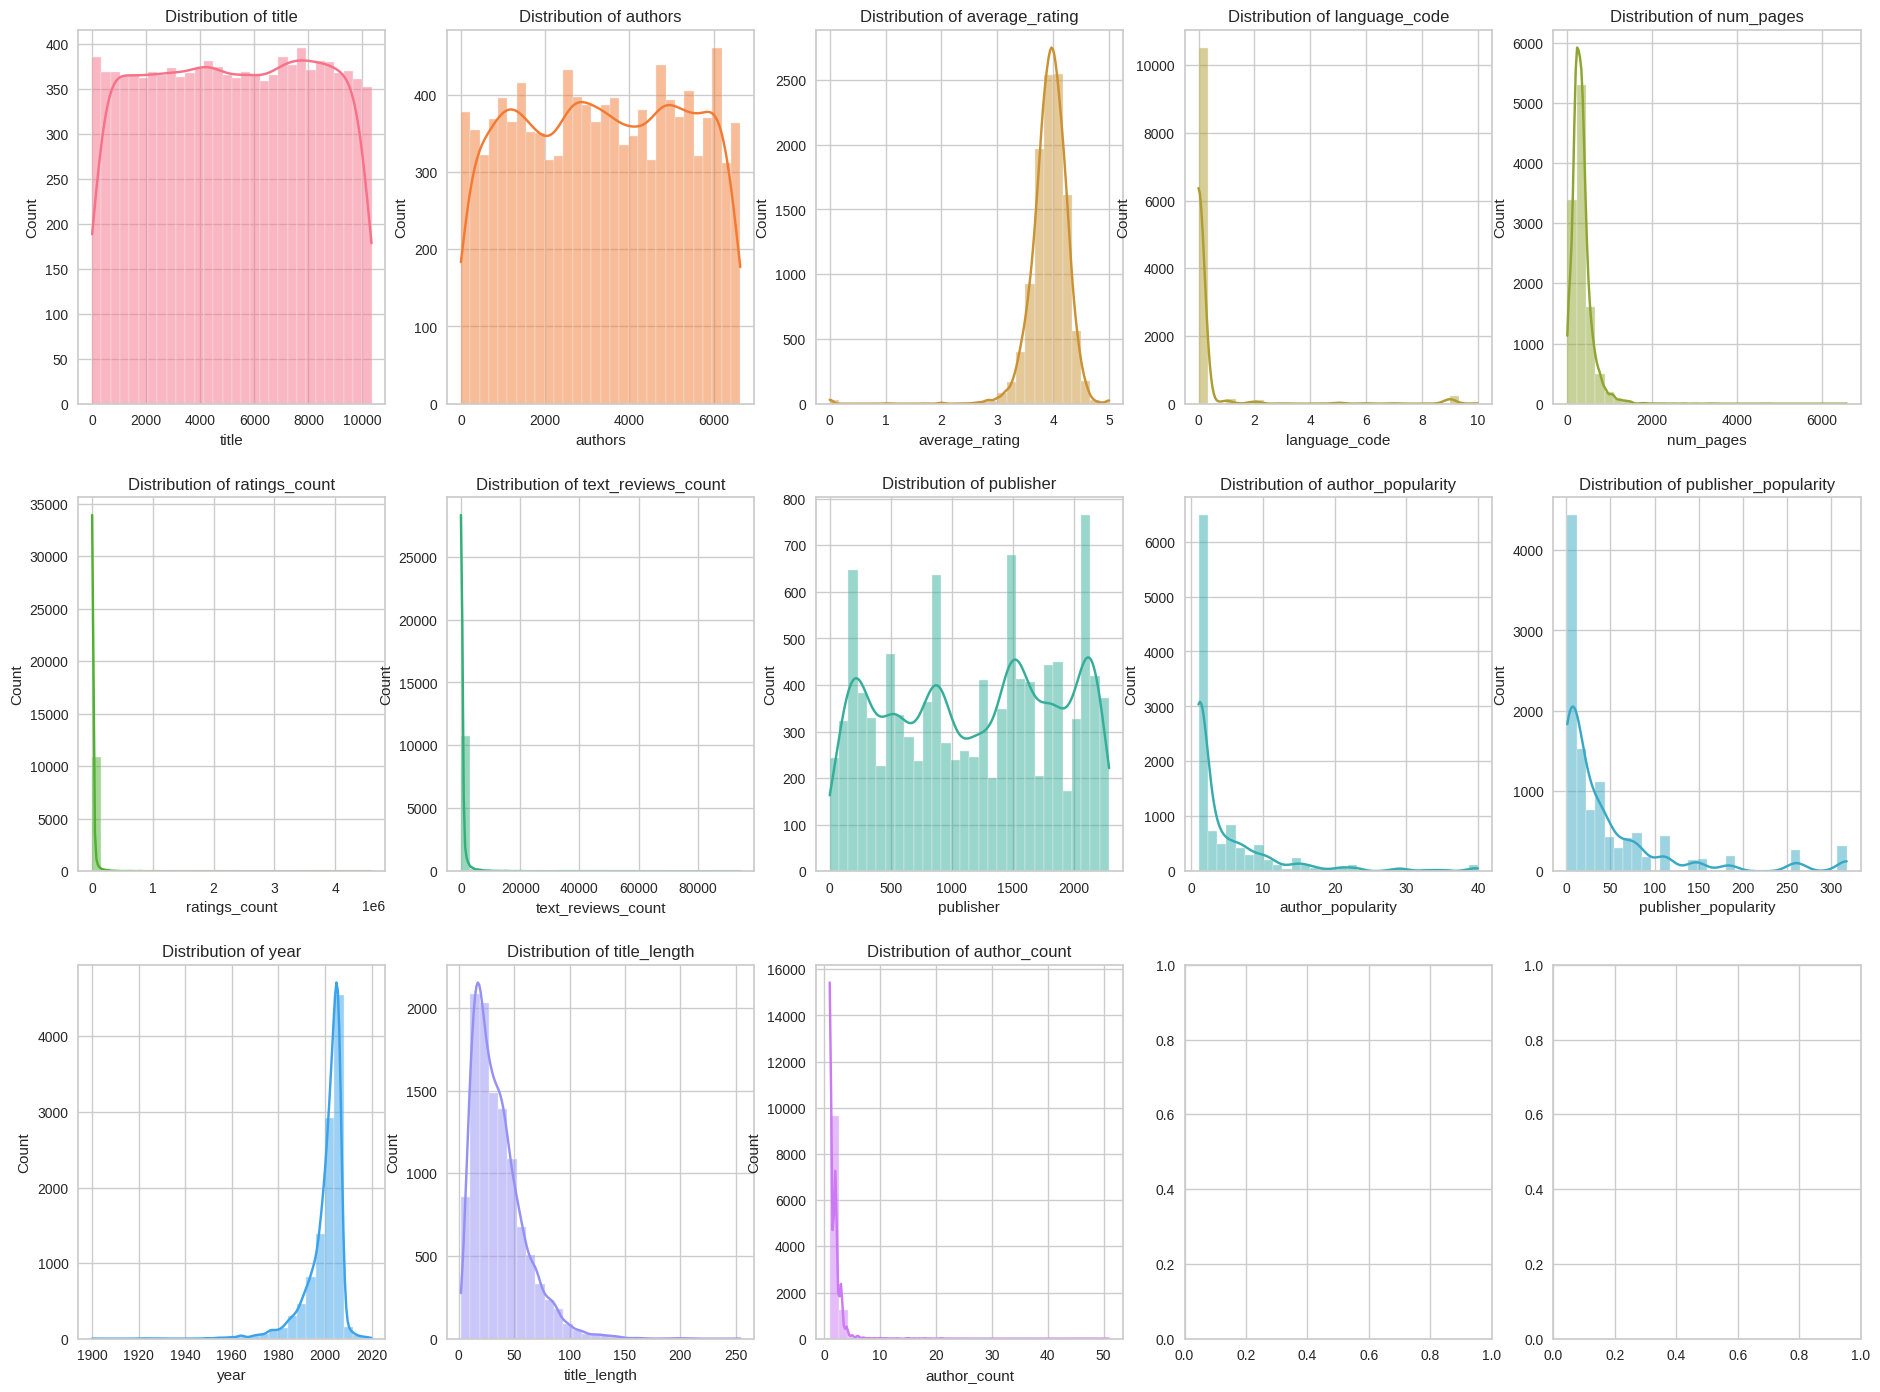

In [176]:
colors = sns.color_palette('husl', n_colors=15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(23, 17), gridspec_kw={'hspace': 0.25})

axes = axes.flatten()

for i, (variable, color) in enumerate(zip(df.columns, colors)):
    sns.histplot(data=df, x=variable, bins=30, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {variable}')

plt.show()

# Checking For Outliers

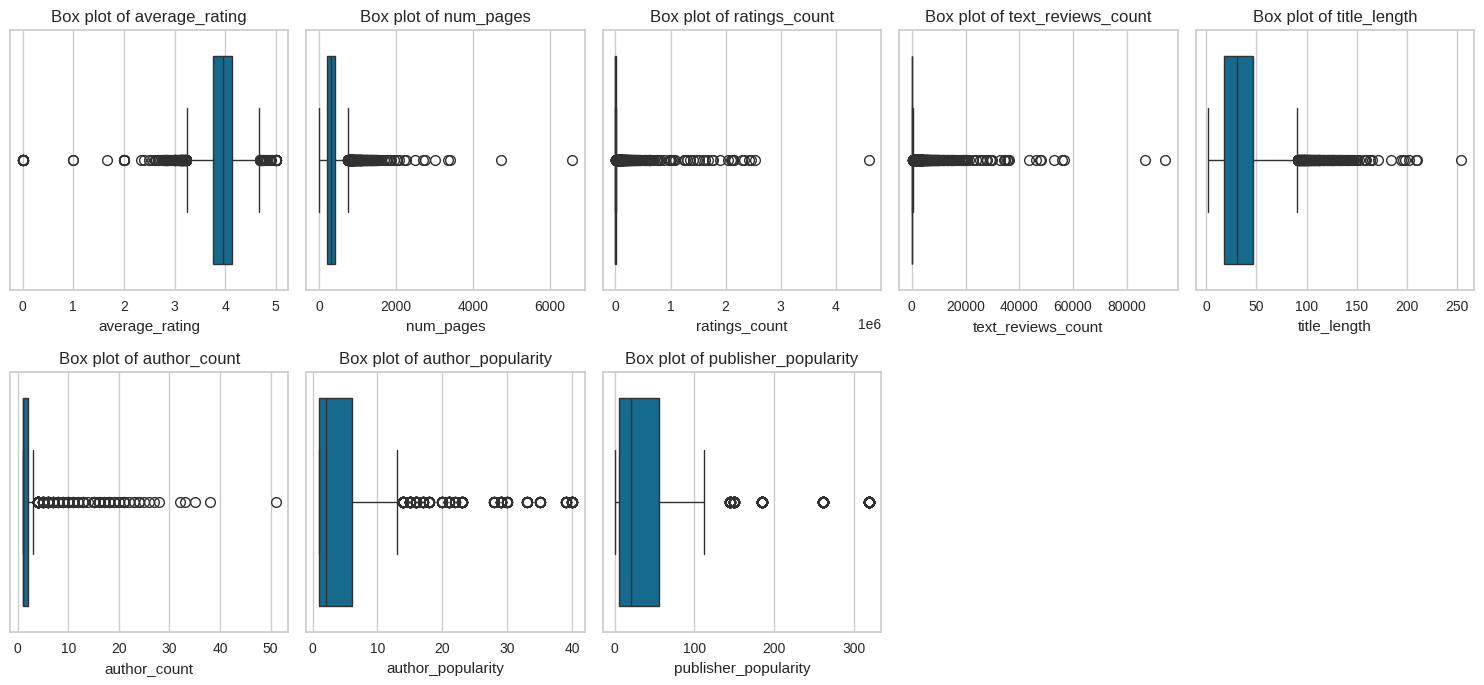

In [177]:
numerical_columns = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count', 'author_popularity', 'publisher_popularity']

# box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

In [178]:
def detect_and_treat_outliers(df, columns_to_check):
    for column in columns_to_check:
        # Calculate Q1, Q3, and IQR for the column
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Determine the lower and upper bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify and treat outliers
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))

        df.loc[outliers, column] = df[column].median()

    return df

cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count', 'author_popularity', 'publisher_popularity']
df = detect_and_treat_outliers(df, cols)


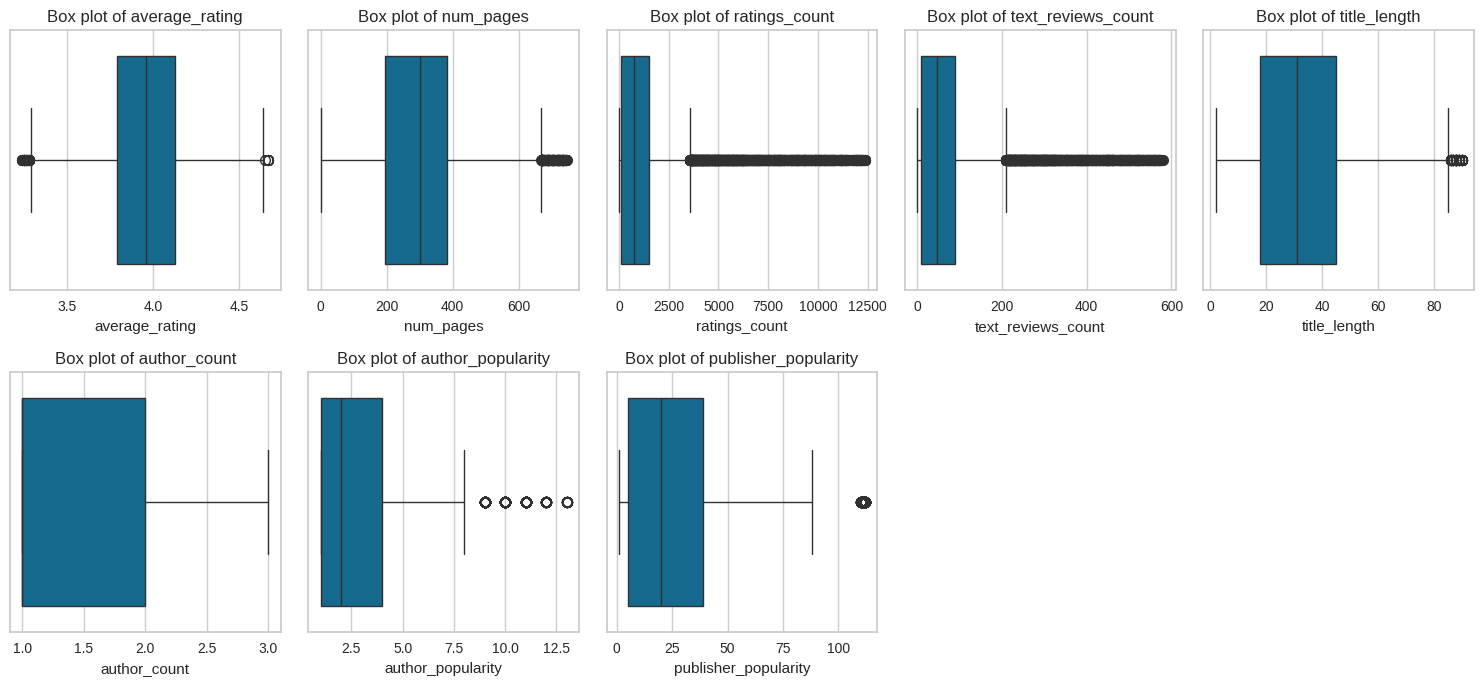

In [179]:
numerical_columns = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count', 'author_popularity', 'publisher_popularity']

# box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

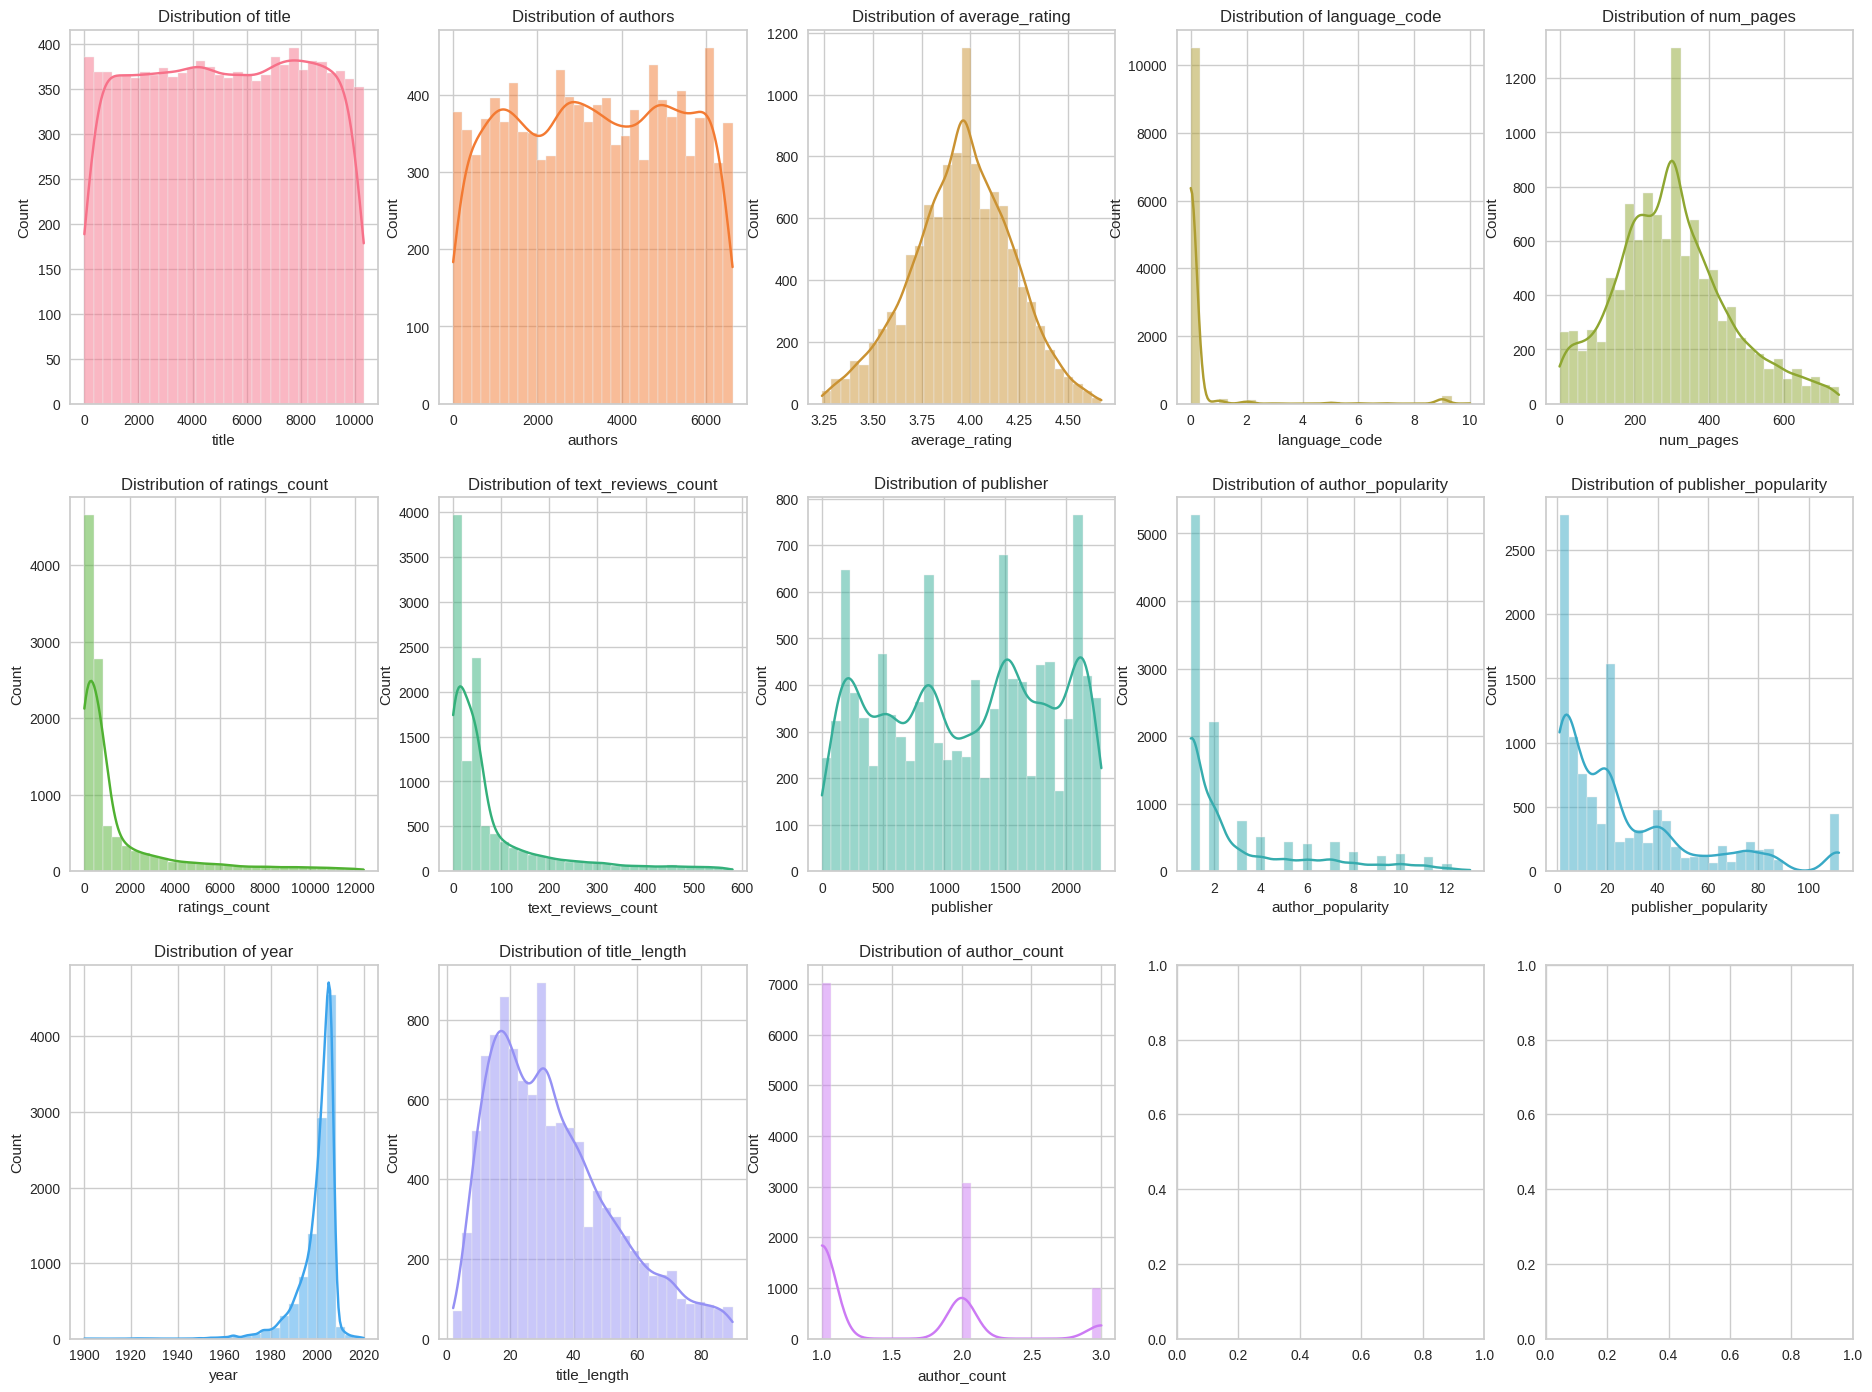

In [180]:
colors = sns.color_palette('husl', n_colors=15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(23, 17), gridspec_kw={'hspace': 0.25})

axes = axes.flatten()

for i, (variable, color) in enumerate(zip(df.columns, colors)):
    sns.histplot(data=df, x=variable, bins=30, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {variable}')

plt.show()

In [105]:
# Save as CSV
df.to_csv('df_cleaned.csv', index=False)

# Regression

In [181]:
df.shape

(11109, 13)

In [184]:
exp = setup(df, target='average_rating')

,Description,Value
0,Session id,7243
1,Target,average_rating
2,Target type,Regression
3,Original data shape,"(11109, 13)"
4,Transformed data shape,"(11109, 13)"
5,Transformed train set shape,"(7776, 13)"
6,Transformed test set shape,"(3333, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [185]:
compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1824,0.0533,0.2310,0.1820,0.0470,0.0467,0.3740
rf,Random Forest Regressor,0.1842,0.0545,0.2335,0.1642,0.0475,0.0471,5.2300
et,Extra Trees Regressor,0.1845,0.0554,0.2353,0.1513,0.0479,0.0472,2.3180
gbr,Gradient Boosting Regressor,0.1864,0.0556,0.2357,0.1481,0.0480,0.0477,1.6640
xgboost,Extreme Gradient Boosting,0.1874,0.0567,0.2380,0.1314,0.0484,0.0480,0.2840
ada,AdaBoost Regressor,0.1974,0.0618,0.2485,0.0535,0.0504,0.0502,0.2920
lr,Linear Regression,0.1985,0.0625,0.2501,0.0413,0.0508,0.0508,1.3500
ridge,Ridge Regression,0.1985,0.0625,0.2501,0.0413,0.0508,0.0508,0.0300
lar,Least Angle Regression,0.1985,0.0625,0.2501,0.0413,0.0508,0.0508,0.0360
br,Bayesian Ridge,0.1985,0.0626,0.2502,0.0405,0.0508,0.0508,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7243, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [186]:
lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1805,0.0522,0.2285,0.1681,0.0465,0.0462
1,0.1837,0.0547,0.2340,0.1709,0.0477,0.0471
2,0.1860,0.0553,0.2351,0.1751,0.0478,0.0475
Mean,0.1834,0.0541,0.2325,0.1714,0.0473,0.0470
Std,0.0022,0.0013,0.0029,0.0029,0.0006,0.0005


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [187]:
evaluate_model(lightgbm)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [188]:
save_model(lightgbm, 'RegressionModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['title', 'authors',
                                              'language_code', 'num_pages',
                                              'ratings_count',
                                              'text_reviews_count', 'publisher',
                                              'author_popularity',
                                              'publisher_popularity', 'year',
                                              'title_length', 'author_count'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.

# Classification

Creation of a new column 'class' in the DataFrame by categorizing the average ratings with labels 'BAD', 'Medium', and 'Good' according to predefined intervals.

In [116]:
import pandas as pd

# Define new bins and labels
bins = [-float('inf'), 3.8, 4.1, float('inf')]  # Adjusted intervals
labels = ['BAD', 'Medium', 'Good']  # Updated labels

# Cut the 'average_rating' column into intervals and assign labels
df['class'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of classes
class_counts = df['class'].value_counts()
print(class_counts)


Medium    4981
Good      3150
BAD       2978
Name: class, dtype: int64


In [117]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Assuming df is your DataFrame
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Print class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))


After SMOTE: Counter({'Good': 4981, 'Medium': 4981, 'BAD': 4981})


In [118]:
# Combine resampled X and y into a DataFrame
new_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['class'])], axis=1)


In [119]:
new_df = new_df_resampled.drop("average_rating", axis=1)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_df['class'] = encoder.fit_transform(new_df['class'])

Charger PyCaret et configurer votre expérience de classification :

In [120]:
from pycaret.classification import *

exp_clf = setup(data=new_df, target='class')


,Description,Value
0,Session id,2890
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(14943, 13)"
4,Transformed data shape,"(14943, 13)"
5,Transformed train set shape,"(10460, 13)"
6,Transformed test set shape,"(4483, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


Comparing different models to find the best one :



In [121]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5921,0.7749,0.5921,0.5885,0.5880,0.3881,0.3896,2.9910
et,Extra Trees Classifier,0.5893,0.7833,0.5893,0.5855,0.5857,0.3839,0.3851,1.4670
xgboost,Extreme Gradient Boosting,0.5771,0.7680,0.5771,0.5777,0.5772,0.3656,0.3657,0.9300
lightgbm,Light Gradient Boosting Machine,0.5744,0.7637,0.5744,0.5755,0.5745,0.3616,0.3618,2.5510
gbc,Gradient Boosting Classifier,0.5174,0.7169,0.5174,0.5160,0.5148,0.2761,0.2771,8.0850
knn,K Neighbors Classifier,0.4926,0.6785,0.4926,0.4886,0.4785,0.2390,0.2449,0.1380
dt,Decision Tree Classifier,0.4819,0.6114,0.4819,0.4811,0.4812,0.2229,0.2230,0.1390
ada,Ada Boost Classifier,0.4685,0.6552,0.4685,0.4662,0.4604,0.2028,0.2057,1.1200
qda,Quadratic Discriminant Analysis,0.4232,0.6064,0.4232,0.4282,0.4028,0.1348,0.1437,0.1020
ridge,Ridge Classifier,0.4190,0.0000,0.4190,0.4148,0.4039,0.1285,0.1325,0.0400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Adjusting the hyperparameters of the best model:

In [122]:
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4809,0.6732,0.4809,0.4690,0.4627,0.2214,0.2270
1,0.4809,0.6723,0.4809,0.4799,0.4708,0.2214,0.2255
2,0.4751,0.6520,0.4751,0.4770,0.4655,0.2128,0.2170
3,0.4790,0.6858,0.4790,0.4697,0.4533,0.2186,0.2277
4,0.4790,0.6691,0.4790,0.4792,0.4607,0.2183,0.2257
5,0.4598,0.6548,0.4598,0.4572,0.4425,0.1896,0.1956
6,0.4751,0.6620,0.4751,0.4765,0.4553,0.2125,0.2205
7,0.4761,0.6691,0.4761,0.4720,0.4608,0.2142,0.2197
8,0.4637,0.6719,0.4637,0.4622,0.4408,0.1956,0.2039


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Assessing the fitted model:

In [123]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

 make predictions using the fitted model:

In [124]:
predictions = predict_model(tuned_model, data=new_df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8745,0.9770,0.8745,0.8745,0.8743,0.8118,0.8120


In [125]:

save_model(tuned_model, 'ClassificationModel')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['title', 'authors',
                                              'language_code', 'num_pages',
                                              'ratings_count',
                                              'text_reviews_count', 'publisher',
                                              'author_popularity',
                                              'publisher_popularity', 'year',
                                              'title_length', 'author_count'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weigh

In [126]:
!pip freeze > requirements.txt